# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
print(api_key)

c72b331be5207802f434e84415c6e7a2


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [4]:
# Create a Data Frame with Cities values and add empty columns for other values

Cities = pd.DataFrame(cities, columns= ['City'])
Cities.head()
Cities["Cloudiness"] = ""
Cities["Country"] = ""
Cities["Date"] = ""
Cities["Humidity"] = ""
Cities["Lat"] = ""
Cities["Lng"] = ""
Cities["Max Temp"] = ""
Cities["Wind Speed"] = ""

Cities.index.name='City_Id'

#Cities=Cities.loc[[1,2,3,4,5,6,7,8,9,10]]  

Cities


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_Id,,,,,,,,,
0,ponta do sol,,,,,,,,
1,vila do maio,,,,,,,,
2,sulat,,,,,,,,
3,cape town,,,,,,,,
4,mataura,,,,,,,,
...,...,...,...,...,...,...,...,...,...
619,cusset,,,,,,,,
620,zhangzhou,,,,,,,,
621,katima mulilo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
##Pass through the cities and get all the attributes required for the plots

city_id = 1
print(f"Begining of the Data Retrival")
print(f"-----------------------------")
for index, row in Cities.iterrows():
    
    city = row["City"]
    query_url = f"{'http://api.openweathermap.org/data/2.5/weather?'}appid={api_key}&q={city}"
   
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #pprint(weather_json)

    try:
            Cities.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
            Cities.loc[index, "Humidity"] = weather_json["main"]["humidity"]
            Cities.loc[index, "Lat"] = weather_json["coord"]["lat"]
            Cities.loc[index, "Lng"] = weather_json["coord"]["lon"]
            Cities.loc[index, "Country"] = weather_json["sys"]["country"]
            Cities.loc[index, "Max Temp"] = weather_json["main"]["temp_max"]
            Cities.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
            Cities.loc[index, "Date"] = datetime.fromtimestamp(weather_json["dt"]).strftime("%m-%d-%y")
            print(f"Processing Record {city_id} of Set 1 | {city}")
            city_id = city_id+1
                        
    except (KeyError,IndexError):
            print(f"City {city} not found...Skiping")   
            
Cities


Begining of the Data Retrival
-----------------------------
Processing Record 1 of Set 1 | ponta do sol
Processing Record 2 of Set 1 | vila do maio
Processing Record 3 of Set 1 | sulat
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | shache
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | grand forks
Processing Record 10 of Set 1 | buzmeyin
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | hithadhoo
City taolanaro not found...Skiping
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | kandrian
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | novyy urengoy
Processing Record 19 of Set 1 | sao felix do xingu
Processing Record 20 of Set 1 | elko
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | itamara

Processing Record 184 of Set 1 | seydi
City stoyba not found...Skiping
Processing Record 185 of Set 1 | avila
Processing Record 186 of Set 1 | coquimbo
Processing Record 187 of Set 1 | sobolevo
Processing Record 188 of Set 1 | guerrero negro
Processing Record 189 of Set 1 | iwanai
Processing Record 190 of Set 1 | turukhansk
Processing Record 191 of Set 1 | usinsk
Processing Record 192 of Set 1 | kristiinankaupunki
Processing Record 193 of Set 1 | soyo
Processing Record 194 of Set 1 | sakakah
Processing Record 195 of Set 1 | buchanan
Processing Record 196 of Set 1 | kiruna
Processing Record 197 of Set 1 | kaihua
Processing Record 198 of Set 1 | biak
City grand centre not found...Skiping
Processing Record 199 of Set 1 | kralendijk
Processing Record 200 of Set 1 | amga
Processing Record 201 of Set 1 | eureka
Processing Record 202 of Set 1 | kalmunai
Processing Record 203 of Set 1 | narsaq
Processing Record 204 of Set 1 | vila franca do campo
City safwah not found...Skiping
Processing Reco

Processing Record 366 of Set 1 | san luis
Processing Record 367 of Set 1 | beberibe
Processing Record 368 of Set 1 | baykit
Processing Record 369 of Set 1 | toamasina
Processing Record 370 of Set 1 | klaksvik
Processing Record 371 of Set 1 | aykhal
Processing Record 372 of Set 1 | gidole
Processing Record 373 of Set 1 | redmond
Processing Record 374 of Set 1 | panacan
Processing Record 375 of Set 1 | dwarka
Processing Record 376 of Set 1 | necochea
Processing Record 377 of Set 1 | kaiwaka
Processing Record 378 of Set 1 | puerto baquerizo moreno
Processing Record 379 of Set 1 | crixas
Processing Record 380 of Set 1 | coruripe
Processing Record 381 of Set 1 | bintulu
City solovetskiy not found...Skiping
Processing Record 382 of Set 1 | estacion coahuila
Processing Record 383 of Set 1 | tambopata
Processing Record 384 of Set 1 | dali
Processing Record 385 of Set 1 | havelock
Processing Record 386 of Set 1 | chirongui
Processing Record 387 of Set 1 | bubaque
Processing Record 388 of Set 1 

Processing Record 553 of Set 1 | chauk
Processing Record 554 of Set 1 | kiama
Processing Record 555 of Set 1 | evensk
Processing Record 556 of Set 1 | douglas
Processing Record 557 of Set 1 | sarahan
Processing Record 558 of Set 1 | shimoda
Processing Record 559 of Set 1 | veyrier
Processing Record 560 of Set 1 | rio grande
Processing Record 561 of Set 1 | talcahuano
Processing Record 562 of Set 1 | aitape
Processing Record 563 of Set 1 | isangel
Processing Record 564 of Set 1 | caxito
Processing Record 565 of Set 1 | west bay
Processing Record 566 of Set 1 | huilong
Processing Record 567 of Set 1 | marand
Processing Record 568 of Set 1 | sonoita
Processing Record 569 of Set 1 | kysyl-syr
Processing Record 570 of Set 1 | taoudenni
Processing Record 571 of Set 1 | novikovo
Processing Record 572 of Set 1 | dembi dolo
Processing Record 573 of Set 1 | cusset
Processing Record 574 of Set 1 | zhangzhou
Processing Record 575 of Set 1 | katima mulilo
Processing Record 576 of Set 1 | touros
Pro

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_Id,,,,,,,,,
0,ponta do sol,40,PT,04-11-20,67,32.67,-17.1,290.15,5.7
1,vila do maio,77,CV,04-11-20,61,15.13,-23.22,298.15,4.1
2,sulat,79,PH,04-11-20,70,11.81,125.45,300.6,0.94
3,cape town,90,ZA,04-11-20,93,-33.93,18.42,291.48,8.7
4,mataura,93,NZ,04-11-20,63,-46.19,168.86,288.71,1.79
...,...,...,...,...,...,...,...,...,...
619,cusset,25,FR,04-11-20,69,46.13,3.46,286.15,1.5
620,zhangzhou,0,CN,04-11-20,63,24.51,117.66,291.15,4
621,katima mulilo,100,NA,04-11-20,88,-17.5,24.27,292.15,1.51


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# #Droping Non found Cities from the Dataframe 
Cities_New = Cities[Cities.Country !='']

# # Output File (CSV)
Cities_New.to_csv(r'Cities.csv', index = False)
# #Dispaly the Value Counts
Cities_New.count()



City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [8]:
# Create a Dataframe using the exported csv
csv = "Cities.csv"

Cities_New = pd.read_csv(csv, low_memory=False)

Cities_New

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ponta do sol,40,PT,04-11-20,67,32.67,-17.10,290.15,5.70
1,vila do maio,77,CV,04-11-20,61,15.13,-23.22,298.15,4.10
2,sulat,79,PH,04-11-20,70,11.81,125.45,300.60,0.94
3,cape town,90,ZA,04-11-20,93,-33.93,18.42,291.48,8.70
4,mataura,93,NZ,04-11-20,63,-46.19,168.86,288.71,1.79
...,...,...,...,...,...,...,...,...,...
572,cusset,25,FR,04-11-20,69,46.13,3.46,286.15,1.50
573,zhangzhou,0,CN,04-11-20,63,24.51,117.66,291.15,4.00
574,katima mulilo,100,NaN,04-11-20,88,-17.50,24.27,292.15,1.51
575,touros,40,BR,04-11-20,88,-5.20,-35.46,300.15,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

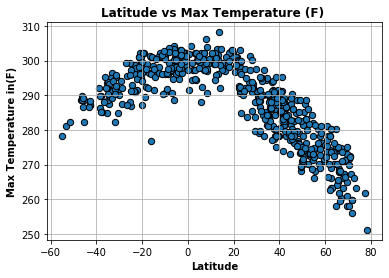

In [9]:
fig, ax = plt.subplots()
x=Cities_New['Lat'].values
y=Cities_New['Max Temp'].values
plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Max Temperature in(F)',fontweight='bold')
plt.title("Latitude vs Max Temperature (F) " ,fontweight='bold')
ax.grid()
plt.savefig('Latitude vs. Temperature Plot.png')

#### Latitude vs. Humidity Plot

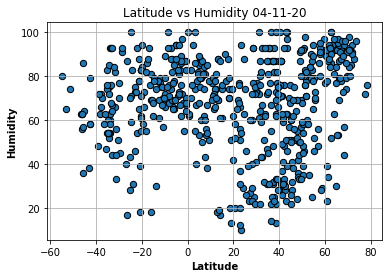

In [10]:
fig, ax = plt.subplots()
Date=Cities_New['Date'].max()
x=Cities_New['Lat'].values
y=Cities_New['Humidity'].values
plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Humidity',fontweight='bold')
plt.title(f"Latitude vs Humidity {Date}")
ax.grid()

plt.savefig('Latitude vs. Humidity Plot.png')

#### Latitude vs. Cloudiness Plot

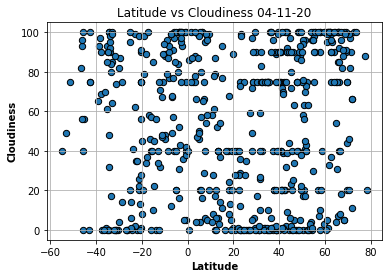

In [11]:
fig, ax = plt.subplots()
Date=Cities_New['Date'].max()
x=Cities_New['Lat'].values
y=Cities_New['Cloudiness'].values
plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Cloudiness',fontweight='bold')
plt.title(f"Latitude vs Cloudiness {Date}")
ax.grid()

plt.savefig('Latitude vs. Cloudiness Plot.png')

#### Latitude vs. Wind Speed Plot

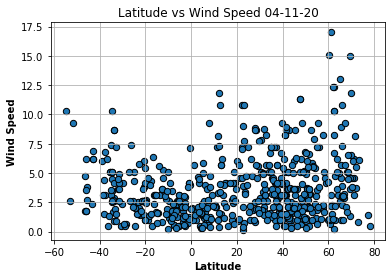

In [12]:
fig, ax = plt.subplots()
Date=Cities_New['Date'].max()
x=Cities_New['Lat'].values
y=Cities_New['Wind Speed'].values
plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Wind Speed',fontweight='bold')
plt.title(f"Latitude vs Wind Speed {Date}")
ax.grid()

plt.savefig('Latitude vs. Wind Speed Plot.png')

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
North_Hemi=Cities_New[Cities_New.Lat>=0]
South_Hemi=Cities_New[Cities_New.Lat<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8067877118062687


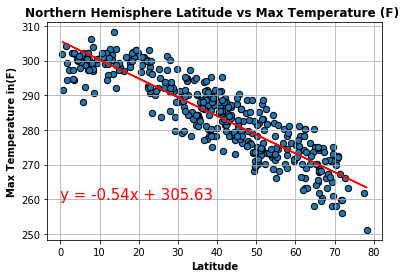

In [14]:
fig, ax = plt.subplots()

x=North_Hemi["Lat"].values.astype(float)
y=North_Hemi["Max Temp"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Max Temperature in(F)',fontweight='bold')
plt.title("Northern Hemisphere Latitude vs Max Temperature (F) " ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(0,260),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('Northern Hemisphere Latitude vs Max Temperature (F).png')

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5487299836947733


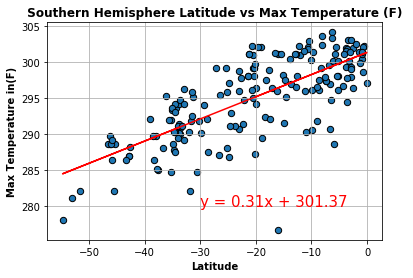

In [15]:
fig, ax = plt.subplots()

x=South_Hemi["Lat"].values.astype(float)
y=South_Hemi["Max Temp"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Max Temperature in(F)',fontweight='bold')
plt.title(" Southern Hemisphere Latitude vs Max Temperature (F) " ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(-30,280),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig('Southern Hemisphere Latitude vs Max Temperature (F).png')

plt.show()

#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03250219526258011


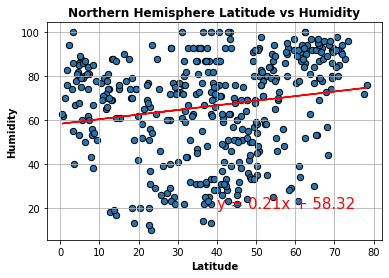

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax = plt.subplots()

x=North_Hemi["Lat"].values.astype(float)
y=North_Hemi["Humidity"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Humidity',fontweight='bold')
plt.title("Northern Hemisphere Latitude vs Humidity" ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(40,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()


plt.savefig('Northern Hemisphere Latitude vs Humidity')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1080116343835285


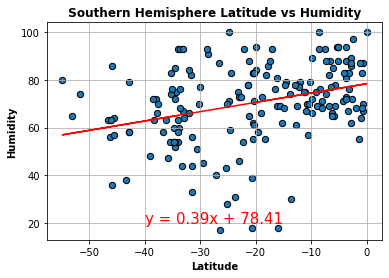

<Figure size 432x288 with 0 Axes>

In [17]:
fig, ax = plt.subplots()

x=South_Hemi["Lat"].values.astype(float)
y=South_Hemi["Humidity"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Humidity',fontweight='bold')
plt.title(" Southern Hemisphere Latitude vs Humidity " ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig('Southern Hemisphere Latitude vs Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02940252853409947


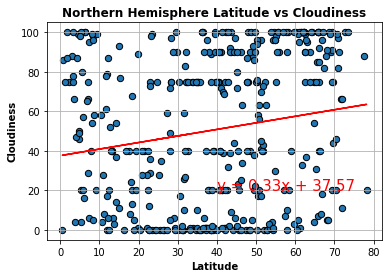

<Figure size 432x288 with 0 Axes>

In [18]:
fig, ax = plt.subplots()

x=North_Hemi["Lat"].values.astype(float)
y=North_Hemi["Cloudiness"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Cloudiness',fontweight='bold')
plt.title("Northern Hemisphere Latitude vs Cloudiness" ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(40,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig('Northern Hemisphere Latitude vs Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007221276438531547


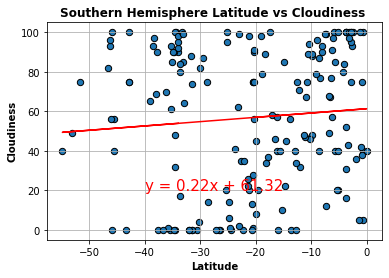

<Figure size 432x288 with 0 Axes>

In [19]:
fig, ax = plt.subplots()

x=South_Hemi["Lat"].values.astype(float)
y=South_Hemi["Cloudiness"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Cloudiness',fontweight='bold')
plt.title("Southern Hemisphere Latitude vs Cloudiness " ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig('Southern Hemisphere Latitude vs Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028761437590032045


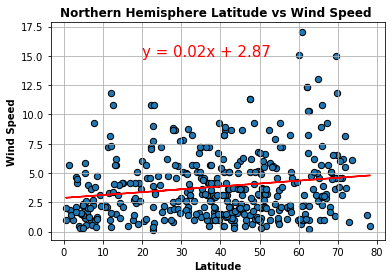

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = plt.subplots()

x=North_Hemi["Lat"].values.astype(float)
y=North_Hemi["Wind Speed"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Wind Speed',fontweight='bold')
plt.title("Northern Hemisphere Latitude vs Wind Speed " ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig('Northern Hemisphere Latitude vs Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1729912785917117


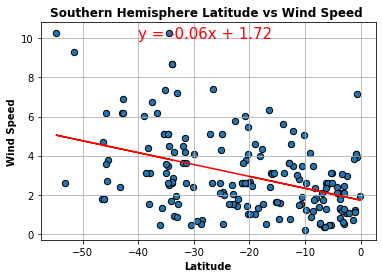

<Figure size 432x288 with 0 Axes>

In [21]:
fig, ax = plt.subplots()

x=South_Hemi["Lat"].values.astype(float)
y=South_Hemi["Wind Speed"].values.astype(float)

plt.scatter(x,y,40,marker='o',edgecolors='black')
plt.xlabel('Latitude',fontweight='bold')
plt.ylabel('Wind Speed',fontweight='bold')
plt.title("Southern Hemisphere Latitude vs Wind Speed " ,fontweight='bold')
ax.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

plt.savefig('Southern Hemisphere Latitude vs Wind Speed')

# Observations based on Regression Plots

1) The Latitude vs Max Temperature in both Northern and Southern Hemisphere clearly shows the temperature decreases when the latitude increases, and it is maximum near the equator. 

2) In Northern Hemisphere Latitude vs Humidity chart, it suggests that every degree increases in latitude there will be an 0.27 times increase in Humidity whereas in southern Hemisphere it decreases by 0.26 times. 

3) The higher concentration of Coordinates at 0 and 100 okta of cloudiness at all the latitudes suggest that there is no correlation of latitude vs Cloudiness in Northern Hemisphere whereas in southern there seems to be a slighter pattern where the cloudiness is more towards the equator.

4) The intercept of the Wind speed in Northern Hemisphere is 2.4 and almost all the coordinates are near or below the slope and the increase in one degree of latitude would increase only 0.03 MPH of Wind speed whereas in southern hemisphere it seems more erratic and more coordinate are near the intercept only near the equator .
